In [1]:
import pickle
import numpy as np

def get_stats(oo):
    file_path = '/media/zzs/4TB/qingliu/qing_intermediate/feat_pickle/'
    fname = file_path + 'res_info_' + oo + '_train.pickle'
    with open(fname, 'rb') as fh:
        layer_feature_dist, _, view_point = pickle.load(fh)
    
    N = len(layer_feature_dist)
    print('{0}: total number of instances {1}'.format(oo, N))
    print(layer_feature_dist[0].shape)
    
    magic_thh = 0.7
    layer_feature_b = [None for nn in range(N)]
    vc_cnt = [None for nn in range(N)]
    for nn in range(N):
        layer_feature_b[nn] = (layer_feature_dist[nn]<magic_thh).astype(int)
        vc_cnt[nn] = np.sum(np.sum(layer_feature_b[nn], axis=1), axis=1)
        
    vc_cnt = np.array(vc_cnt)
    vc_avg = np.mean(vc_cnt, axis=0)
    
    vc_cnt2 = [None for nn in range(N)]
    for nn in range(N):
        vc_cnt2[nn] = np.mean(np.sum(layer_feature_b[nn], axis=0))
    
    print('{0} avgnum of VC fired at each pixel: {1}'.format(oo, np.mean(vc_cnt2)))

    return vc_avg


In [3]:
import scipy.io as sio
objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
for oo in objects:
    vc_avg = get_stats(oo)
    sortidd = np.argsort(vc_avg)
    selected_idd = np.append(sortidd[0:50], sortidd[-50:])
    selected_vc_msk = np.zeros(len(vc_avg)).astype('bool')
    selected_vc_msk[selected_idd] = True
    sio.savemat('/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/{0}_vc_stats.mat'.format(oo), \
            mdict={'selected_vc_msk':selected_vc_msk})

car: total number of instances 1000
(216, 21, 14)
car avgnum of VC fired at each pixel: 1.6614753174521348
aeroplane: total number of instances 849
(216, 44, 14)
aeroplane avgnum of VC fired at each pixel: 1.5030904815946742
bicycle: total number of instances 373
(216, 21, 14)
bicycle avgnum of VC fired at each pixel: 1.298739203357541
bus: total number of instances 517
(216, 18, 14)
bus avgnum of VC fired at each pixel: 1.9109816795575398
motorbike: total number of instances 315
(216, 26, 14)
motorbike avgnum of VC fired at each pixel: 1.17477151576926
train: total number of instances 495
(216, 16, 14)
train avgnum of VC fired at each pixel: 1.2558895268535404


In [61]:
vc_avg_car = get_stats('car')
vc_avg_bus = get_stats('bus')
print(vc_avg_car.shape, vc_avg_bus.shape)

car: total number of instances 1000
(216, 21, 14)
car avgnum of VC fired at each pixel: 1.6614753174521348
bus: total number of instances 517
(216, 18, 14)
bus avgnum of VC fired at each pixel: 1.9109816795575398
(216,) (216,)


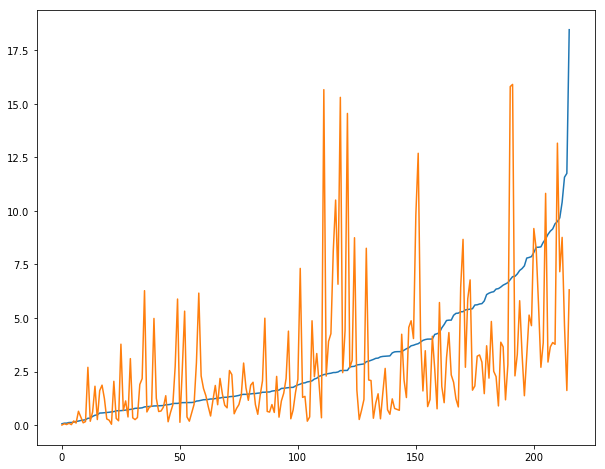

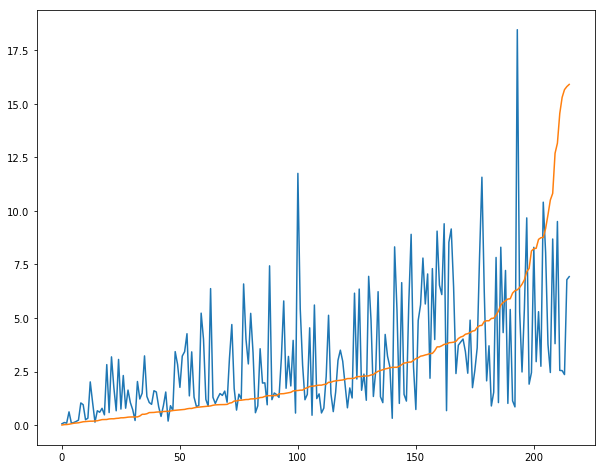

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

sortidd = np.argsort(vc_avg_car)
plt.plot(vc_avg_car[sortidd])
plt.plot(vc_avg_bus[sortidd])
plt.show()

sortidd2 = np.argsort(vc_avg_bus)
plt.plot(vc_avg_car[sortidd2])
plt.plot(vc_avg_bus[sortidd2])
plt.show()

In [64]:
vc_diff = vc_avg_car - vc_avg_bus
sortid = np.argsort(vc_diff)
sortid[0:5]+1, sortid[-5:]+1


(array([45, 31, 38, 85, 22]), array([150,  41,   3,  62,  17]))

In [73]:
vc_car = np.append(sortidd[0:50], sortidd[-50:])
vc_bus = np.append(sortidd2[0:50], sortidd2[-50:])

In [84]:
vvcar = []
for vv in vc_car:
    if vv not in vc_bus:
        vvcar.append(vv)
        
np.array(vvcar[0:10])+1, np.array(vvcar[-10:])+1

(array([171, 103, 159, 210, 172,  28,  84,  18, 113, 204]),
 array([ 16,  41,  47,  30,  20, 150, 102,   4, 178,  62]))

In [85]:
vvbus = []
for vv in vc_bus:
    if vv not in vc_car:
        vvbus.append(vv)
        
np.array(vvbus[0:10])+1, np.array(vvbus[-10:])+1

(array([168, 162, 123,   8, 126, 114,  11, 157, 198, 156]),
 array([199, 173, 104,  77, 135,  10,  46,  38,  31,  45]))

In [11]:
from scipy.misc import logsumexp
import time

arr = np.random.random((100000,2))
arr[:,1] = 0.


_s = time.time()
for nn in range(150):
   rst1 = arr[:,0]*arr[:,0]
   rst2 = np.log(np.exp(arr[:,0])+1.)
   rst = np.sum(rst1-rst2)


_e = time.time()
print((_e-_s))

0.9790656566619873


In [10]:
(_e-_s)*1000

2248.5666275024414